In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score

from sklearn.preprocessing import StandardScaler



In [3]:
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [4]:
train.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
y = train['label']
X = train.iloc[:, 1:]

In [6]:
X.shape

(42000, 784)

In [7]:
X.iloc[0,:]

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Name: 0, Length: 784, dtype: int64

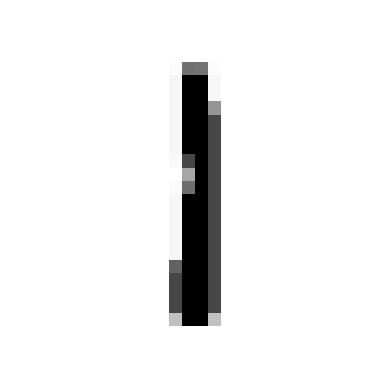

In [8]:
import matplotlib.pyplot as plt

def visualizeNum(pixeldata):
        # convert 784 pixel to 28*28 squared matrix
    number_pixel = pixeldata.to_numpy().reshape(28,28)
    plt.imshow(number_pixel, cmap='binary') # cmap = coloring, binary = black white
    plt.axis('off')

# example : 
visualizeNum(X.iloc[2,:])

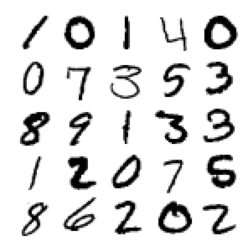

In [9]:
plt.figure(figsize=(3,3))
count = 0
for i in range(25):
    plt.subplot(5,5,i+1) # ex. subplot(5,5,1) -> layout 5*5, place current img to 1st position , ...., subplot (5,5,26) = place 25th picture
    plt.subplots_adjust(wspace=0, hspace=0)
    visualizeNum(X.iloc[i,:])

In [10]:
check_na = X.isna().sum()
check_na[check_na!=0]
# none of null value in every attribute

Series([], dtype: int64)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.33)

# Trying simple classification 
- Binary classification ('5' or not)


In [12]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)
y_train_5[:4]

38060    False
22672    False
14625    False
1475     False
Name: label, dtype: bool

In [13]:

log_model1 = LogisticRegression(random_state=42).fit(X_train, y_train_5)


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([ True])

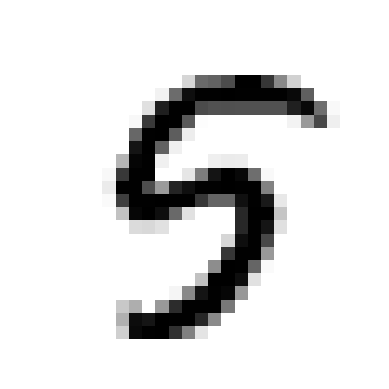

In [14]:
visualizeNum(X.iloc[8,:])
log_model1.predict([X.iloc[8,:]])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([False])

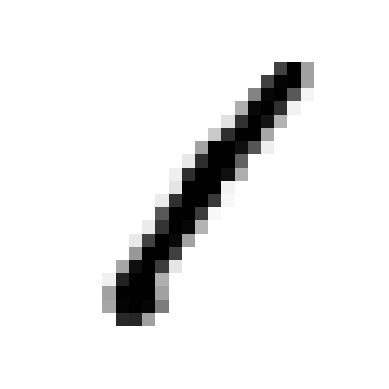

In [15]:
visualizeNum(X.iloc[0,:])
log_model1.predict([X.iloc[0,:]])

# Performance Measures


In [16]:
cross_val_score(log_model1, X_train, y_train_5, cv=5, scoring='accuracy')

array([0.97423596, 0.97263682, 0.96997157, 0.96997157, 0.97157072])

- Getting high accuracy because the number of 'not 5' labels are larger than '5' labels.
- Next, testing with dummy classifier (baseline classifier) that is a simplest machine learning classifier, and then compare to previous logistic regression model

In [17]:


dummy_clf = DummyClassifier(random_state=42).fit(X_train, y_train_5)
cross_val_score(dummy_clf, X_train, y_train_5, cv=5, scoring="accuracy")

array([0.9079602, 0.9079602, 0.9079602, 0.9079602, 0.9079602])

- Dummy classifier gives 90.xx% of accuracy score.
- Imply that we can get 90% accuracy score without logistic regression model.
- Imply that measuring performance by accuracy score may be not good metric for classification model because the probability of occurring '5' is very low. The model can predict 'not 5' labels easily. 
- Insteadly, using of confusion matrix is more prefered.

# Confusion Matrix

## Cross Validation Prediction (using library)

In [18]:

y_train_pred = cross_val_predict(log_model1, X_train, y_train_5, cv=5)
print('y_train_pred = ', y_train_pred)
print('total of prediction points = ', len(y_train_pred))


y_train_pred =  [False False False ... False False False]
total of prediction points =  28140


- cross validation prediction divides train set into 5 folds , and test set in each fold used for model prediction.
- we can implement cross validation prediction manuallt to inspect the result.

## Cross Validation Prediction (Alternative)

In [19]:
from sklearn.model_selection import StratifiedKFold # provides train/test indices to split data in train/test sets.
from sklearn.base import clone # copy the model without attached data (unfitted model)

In [20]:
type(y_train_5)

pandas.core.series.Series

In [21]:
# Because of train_test_split , some index may not be in train set -> lead to index error when implementing K-Fold below
 # reset index or convert dataframe/serie to numpy array to resolve this error.
X_train = X_train.to_numpy() 
y_train_5 = y_train_5.to_numpy()

In [22]:

skfolds = StratifiedKFold(n_splits=5) # This data is already shuffled, if not, we can set shuffle=True and random_state=42.
fold = 0
n_tested = 0
for train_index, test_index in skfolds.split(X_train, y_train_5):
    #print(train_index, test_index)
    fold += 1
    clone_clf = clone(log_model1) # copy of logistic model without fitting data (in each fold)
    X_train_folds = X_train[train_index,:]
    X_test_folds = X_train[test_index,:]
    y_train_folds = y_train_5[train_index]
    y_test_folds = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_folds) # predicted y value in each fold
    print(y_pred)
    print('n_sample = ', len(y_pred))
    n_corrects = sum(y_pred == y_test_folds)
    print('n_corrects = ', n_corrects)
    print('accuracy = ', n_corrects/len(y_pred))
    n_tested += len(y_pred)
    print('finish fold_no = ', fold, ', n_tested = ', n_tested)

    print('----------------------------------------------')



[False False False ...  True  True  True]
n_sample =  5628
n_corrects =  5483
accuracy =  0.9742359630419332
finish fold_no =  1 , n_tested =  5628
----------------------------------------------
[False False False ...  True  True  True]
n_sample =  5628
n_corrects =  5474
accuracy =  0.972636815920398
finish fold_no =  2 , n_tested =  11256
----------------------------------------------
[False False False ...  True False False]
n_sample =  5628
n_corrects =  5459
accuracy =  0.9699715707178393
finish fold_no =  3 , n_tested =  16884
----------------------------------------------
[False False False ... False False False]
n_sample =  5628
n_corrects =  5459
accuracy =  0.9699715707178393
finish fold_no =  4 , n_tested =  22512
----------------------------------------------
[ True False  True ... False False False]
n_sample =  5628
n_corrects =  5468
accuracy =  0.9715707178393745
finish fold_no =  5 , n_tested =  28140
----------------------------------------------


- Noted that there are 5 results from 5 folds, 5628 samples for each fold
- Noted that each validation set in each fold is not repeated.
- When combining every result sets, we will get prediction for all of training dataset.


** We will use y_train_pred prediction result from cross_val_predict() to build a confusion matrix
**

In [23]:
cm = confusion_matrix(y_train_5, y_train_pred)

In [24]:
print(cm)
# positive = '5'
# negative  = not '5'

[[25244   306]
 [  491  2099]]


In [25]:
cm[0][0]

25244

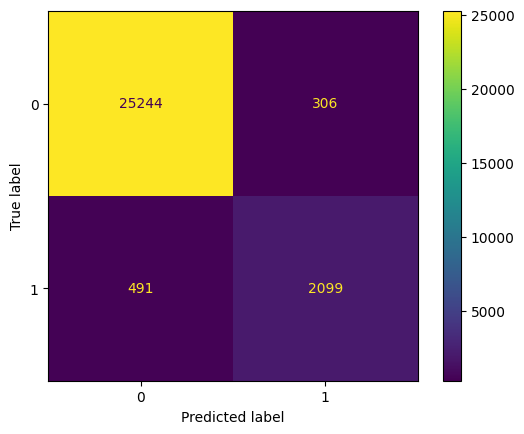

In [26]:
cm_disp = ConfusionMatrixDisplay(cm)
cm_disp.plot()

- True label (aka. Actual label)
- 0 = Negative = 'not 5', 1 = Positive = '5'
- [Actual Negative-Predicted Negative (True Negative -TN), Actual Negative-Predicted Positive (False Positive -FP)
-   Actual Positive-Predicted Negative (False Negative -FN), Actual Positive-Predicted Positive (True Positive -TP)]


## Precision/ Recall/ F1-score

In [27]:
# manual calculation
TN, FP, FN, TP = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
precision = TP/(TP+FP) # precision = Success Positive Predicted / (Success Positive Predicted + Failed Positive Predicted)
recall = TP/(TP+FN)  # False Negative = Predicted Negative, but Actual Positive, so recall = true positive predicted / total actual positive
F1 = 2*((precision*recall)/(precision+recall))
print('Precision =', precision)
print('Recall = ', recall)
print('F1 score = ', F1)

Precision = 0.8727650727650728
Recall =  0.8104247104247104
F1 score =  0.8404404404404403


In [28]:
# from sklearn
precision_lib = precision_score(y_train_5, y_train_pred)
recall_lib = recall_score(y_train_5, y_train_pred)
f1_lib = f1_score(y_train_5, y_train_pred)
print('Precision (sklearn) = ', precision_lib)
print('Recall (sklearn) = ', recall_lib)
print('F1 score (sklearn) = ', f1_lib)

Precision (sklearn) =  0.8727650727650728
Recall (sklearn) =  0.8104247104247104
F1 score (sklearn) =  0.8404404404404403


Precision = 0.87 
Recall = 0.81
F1-score = 0.84 (average of precision and recall)

# Precision/ Recall Tuning

In [29]:
y_score = cross_val_predict(log_model1, X_train, y_train_5, cv=5, method='predict_proba') # logistic regression -> using proability score to decide, sgd -> using decision score (from decision function)
print(y_score) # y_score column 0 -> probability decision for class 0 (False) , column 1 -> prob for class 1 (True) 

# note: check order of class by log_model1.classes_

[[8.99562224e-01 1.00437776e-01]
 [9.99999203e-01 7.96854442e-07]
 [9.99524551e-01 4.75449045e-04]
 ...
 [9.99998617e-01 1.38312204e-06]
 [9.99263997e-01 7.36002804e-04]
 [9.99086689e-01 9.13311469e-04]]


In [30]:
y_score[:,1] # probability for class 1 (True)

array([1.00437776e-01, 7.96854442e-07, 4.75449045e-04, ...,
       1.38312204e-06, 7.36002804e-04, 9.13311469e-04])

### Precision-Recall Curve

28140 28141 28141


Text(0.5, 1.0, 'Precision-Recall vs. Threshold')

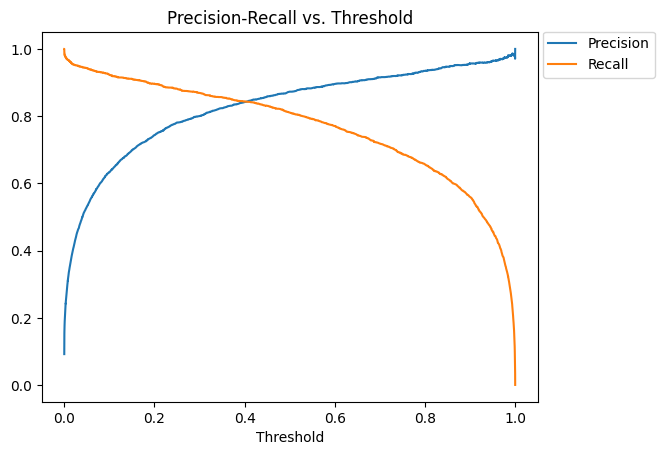

In [31]:
from sklearn.metrics import precision_recall_curve
precision, recall, threshold = precision_recall_curve(y_train_5, y_score[:,1])
#print(precision)
#print(recall)
#print(threshold)
print(len(threshold), len(precision), len(recall)) # shows that 28140, 28141, 28141 --> Last precision and recall value should be ignored (last value are 1 and 0 for precision and recall respectively).

plt.figure()
plt.plot(threshold, precision[:-1], label='Precision')
plt.plot(threshold, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.legend(bbox_to_anchor=(1.25, 1.02), loc='upper right')
#plt.xlim(-15,)
plt.title('Precision-Recall vs. Threshold')

Text(0.5, 1.0, 'Precision-Recall Curve')

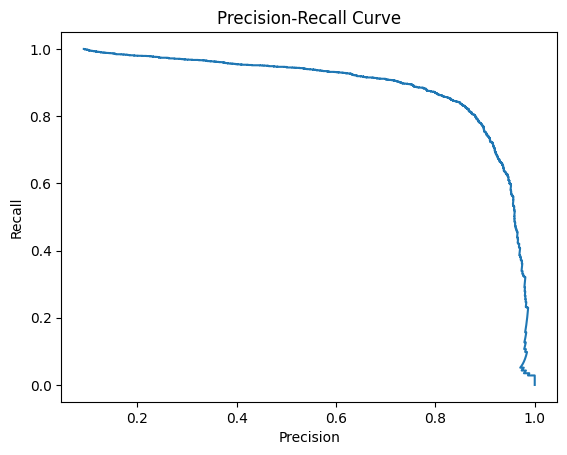

In [32]:
plt.figure()
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision-Recall Curve')

- Suppose that we want high recall and moderate precision

In [33]:
ind = np.where((recall > 0.90) & (recall<0.905))[0][0]
print('recall = ', recall[ind], 'precision = ', precision[ind], 'threshold = ', threshold[ind])

recall =  0.9046332046332046 precision =  0.7195945945945946 threshold =  0.17124340456184658


- We will set threshold = 0.1712 for expected recall =0.90 and expected precision = 0.72

In [34]:
threshold_sel = 0.1712
y_pred_cust_thres = np.where(log_model1.predict_proba(X_train)[:, 1] >= threshold_sel, 1, 0).astype(bool)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [35]:
y_pred_cust_thres

array([False, False, False, ..., False, False, False])

In [36]:
y_train_5

array([False, False, False, ..., False, False, False])

In [37]:
precision_new = precision_score(y_train_5, y_pred_cust_thres)
recall_new = recall_score(y_train_5, y_pred_cust_thres)
f1_new = f1_score(y_train_5, y_pred_cust_thres)
print('@threshold = 0.1712 (lower from default = 0.5)')
print('Precision = ', precision_new)
print('Recall = ', recall_new)
print('F1 score = ', f1_new)

@threshold = 0.1712 (lower from default = 0.5)
Precision =  0.7617842454919329
Recall =  0.9297297297297298
F1 score =  0.8374195792036168


In [38]:
compare_perf_df = pd.DataFrame({'threshold':[0.5, 0.1712], 'Precision':[precision_lib, precision_new], 'Recall':[recall_lib, recall_new], 'F1-Score':[f1_lib, f1_new]})

In [39]:
compare_perf_df

,threshold,Precision,Recall,F1-Score
0,0.5000,0.872765,0.810425,0.84044
1,0.1712,0.761784,0.929730,0.83742


### ROC Curve (Additional)

In [40]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_score[:, 1])

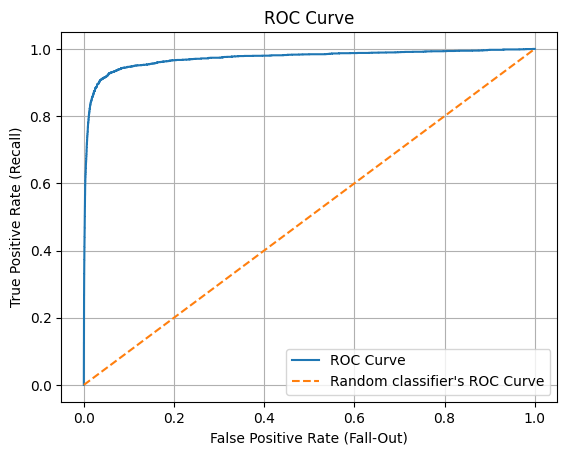

In [41]:
plt.figure()
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0,1], [0,1], label='Random classifier\'s ROC Curve', linestyle='dashed') # Classifier acts like random decision.
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.legend(loc='lower right')


- PR curve is commonly used when there are few positive-class samples in the dataset.
- ROC curve is commonly used when there are many positive-class samples in the dataset.

### AUC - Area under the curve 
AUC of ROC 
- 0.5 for Random classifier (baseline)
- AUC close to 1 for perfect classifier.

In [42]:
from sklearn.metrics import roc_auc_score
print('AUC of ROC score = ', roc_auc_score(y_train_5, y_score[:, 1]))

AUC of ROC score =  0.9728680080695739


# Models Comparision
- log_model1 -> Logistic Regression (/)
- model2 -> SGD Classifier (-) ; Logistic Regression with SGD Training
- model3 -> Random Forrest (-)

In [43]:
model2 = SGDClassifier(random_state=42)
model2.fit(X_train, y_train_5)
y_score_model2 = cross_val_predict(model2, X_train, y_train_5, method='decision_function', cv=5)

model3 = RandomForestClassifier(random_state=42)
model3.fit(X_train, y_train_5)
y_score_model3 = cross_val_predict(model3, X_train, y_train_5, method='predict_proba', cv=5)

In [44]:
y_score_model2

array([   702.91652572, -60834.02835772, -26744.47538247, ...,
       -76653.21886253, -49956.0130848 , -36367.26201201])

In [45]:
model3.classes_ # class 0 = False, class 1 = True

array([False,  True])

In [46]:
y_score_model3_pos = y_score_model3[:, 1]
y_score_model3_pos

array([0.3 , 0.  , 0.  , ..., 0.02, 0.08, 0.17])

Text(0, 0.5, 'Recall')

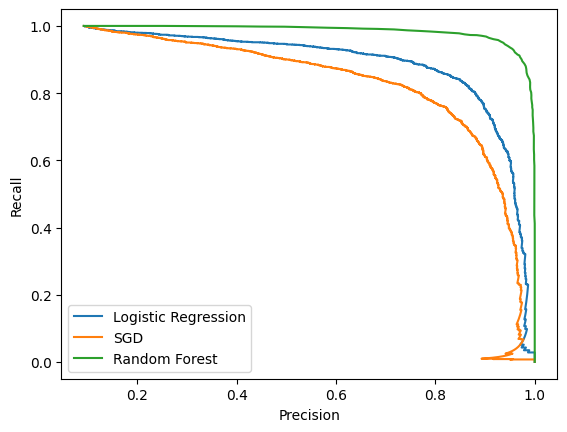

In [47]:
precision_sgd, recall_sgd, thres_sgd = precision_recall_curve(y_train_5, y_score_model2)
precision_rf, recall_rf, thres_rf = precision_recall_curve(y_train_5, y_score_model3_pos)
# Plotting PR Curve
plt.figure()
plt.plot(precision, recall, label='Logistic Regression')
plt.plot(precision_sgd, recall_sgd, label='SGD')
plt.plot(precision_rf, recall_rf, label='Random Forest')
plt.legend(loc='lower left')
plt.xlabel('Precision')
plt.ylabel('Recall')

In [48]:
print('AOC of Logistic Regression', roc_auc_score(y_train_5, y_score[:,1]))
print('AOC of SGD', roc_auc_score(y_train_5, y_score_model2))
print('AOC of Random Forest', roc_auc_score(y_train_5, y_score_model3_pos))

AOC of Logistic Regression 0.9728680080695739
AOC of SGD 0.9609517261180666
AOC of Random Forest 0.9980514397539838


# Multi-Class Classification
- Every classifiers builted by sklearn have "built-in" multiclass classification support.
- 2 techniques used in multiclass classification are One-Vs-One and One-Vs-The-Rest.

In [49]:
# Using Decision Tree for multiclass classification
model4_multi_rf = RandomForestClassifier(random_state=42)
model4_multi_rf.fit(X_train[:2000], y_train[:2000])
y_pred_model4 = model4_multi_rf.predict(X_train)

In [50]:
model4_multi_rf.predict([X_train[2]])

array([3])

In [51]:
model4_multi_rf.predict_proba([X_train[2]])
# len() = 10 -> get 10 models for 10 class -> This model uses One Vs Rest technique.

array([[0.  , 0.26, 0.02, 0.61, 0.  , 0.  , 0.  , 0.03, 0.02, 0.06]])

In [52]:
model4_multi_rf.score(X_train, y_train)

0.9223525230987918

In [53]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
# forcing classification technique in models
forced_rf_ovo = OneVsOneClassifier(RandomForestClassifier(random_state=42)).fit(X_train[:2000], y_train[:2000]) # 45 models
forced_rf_ovr = OneVsRestClassifier(RandomForestClassifier(random_state=42)).fit(X_train[:2000], y_train[:2000]) # 10 models

In [54]:
forced_rf_ovo.score(X_train, y_train)

0.9214641080312722

In [55]:
forced_rf_ovr.score(X_train, y_train)

0.9208244491826582

Note that 
- Accuracy can be used in this case because target label are '0-9' , not only '5'. -> No imbalance in data targets
- The number of instances for each data label is nearly the same, so the model's accuracy is less likely to be an overestimate.
- (If data target were only '5' or 'not 5', there would be an imbalance in predictions. In such cases, accuracy would not be prefered.)

In [56]:
y_train.value_counts()

label
1    3164
7    2921
3    2880
9    2840
0    2799
2    2763
6    2740
8    2729
4    2714
5    2590
Name: count, dtype: int64

## Multiclass Model Selection

In [57]:
multi_log = LogisticRegression(random_state=42).fit(X_train, y_train)
multi_rf = RandomForestClassifier(random_state=42).fit(X_train[:2000], y_train[:2000]) # only 2000 data points
multi_sgd = SGDClassifier(random_state=42).fit(X_train, y_train)

In [58]:
# support vector machine classifier

multi_svc = SVC(random_state=42).fit(X_train[:2000], y_train[:2000]) # only 2000 data points

In [59]:
score_multi_log = cross_val_score(multi_log, X_train, y_train, cv=3, scoring='accuracy', n_jobs=-1)
score_multi_rf = cross_val_score(multi_rf, X_train, y_train, cv=3, scoring='accuracy', n_jobs=-1)
score_multi_sgd = cross_val_score(multi_sgd, X_train, y_train, cv=3, scoring='accuracy', n_jobs=-1)
score_multi_svc = cross_val_score(multi_svc, X_train, y_train, cv=3, scoring='accuracy', n_jobs=-1)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [60]:
[score_multi_log, score_multi_rf, score_multi_sgd, score_multi_svc]

[array([0.90095949, 0.90245203, 0.90010661]),
 array([0.95469083, 0.95852878, 0.95916844]),
 array([0.85724947, 0.87590618, 0.86823028]),
 array([0.96812367, 0.97238806, 0.97004264])]

### Feature Scaling

In [61]:
# normalizing feature data 
X_scaled = StandardScaler().fit_transform(X_train.astype('float64'))


In [62]:
multi_log_scaled = LogisticRegression(random_state=42).fit(X_scaled, y_train)
multi_rf_scaled = RandomForestClassifier(random_state=42).fit(X_scaled[:2000], y_train[:2000]) # only 2000 data points
multi_sgd_scaled = SGDClassifier(random_state=42).fit(X_scaled, y_train)
multi_svc_scaled = SVC(random_state=42).fit(X_scaled[:2000], y_train[:2000]) # only 2000 data points

In [63]:
score_multi_log_scaled = cross_val_score(multi_log_scaled, X_scaled, y_train, cv=3, scoring='accuracy', n_jobs=-1)
score_multi_rf_scaled = cross_val_score(multi_rf_scaled, X_scaled, y_train, cv=3, scoring='accuracy', n_jobs=-1)
score_multi_sgd_scaled = cross_val_score(multi_sgd_scaled, X_scaled, y_train, cv=3, scoring='accuracy', n_jobs=-1)
score_multi_svc_scaled = cross_val_score(multi_svc_scaled, X_scaled, y_train, cv=3, scoring='accuracy', n_jobs=-1)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [64]:
[score_multi_log_scaled, score_multi_rf_scaled, score_multi_sgd_scaled, score_multi_svc_scaled]

[array([0.88816631, 0.89285714, 0.89051173]),
 array([0.95469083, 0.958742  , 0.95938166]),
 array([0.90362473, 0.90607676, 0.90831557]),
 array([0.94829424, 0.95373134, 0.95426439])]

Choose SVC model.

## Error Analysis

In [65]:
y_train_pred = cross_val_predict(multi_svc_scaled, X_scaled, y_train, cv=3, n_jobs=-1)

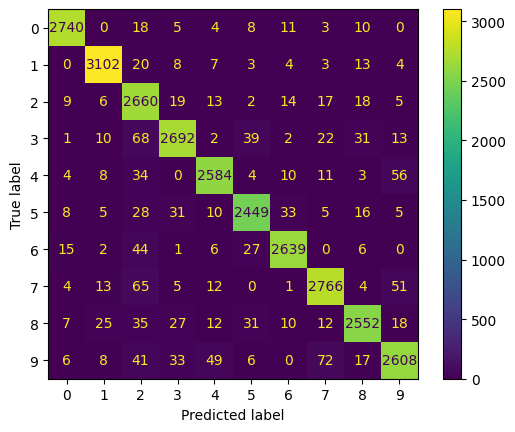

In [66]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

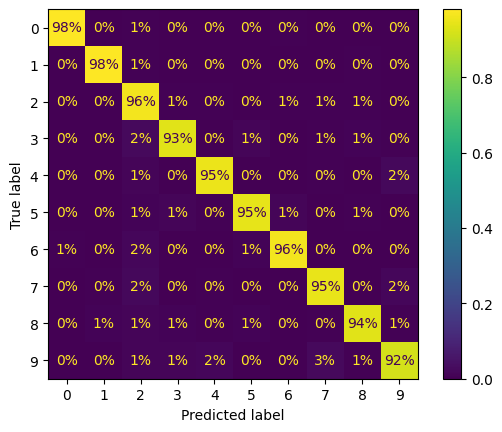

In [67]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize='true', values_format='.0%') # normalized by row

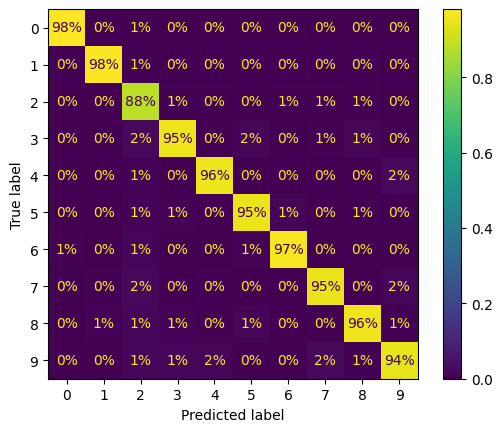

In [68]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize='pred', values_format='.0%') # normalized by column

Let's see the error in 3rd column, 2% of predicted '2' labels are incorrect (actual is '3').

# Submission

In [69]:
X_test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [70]:
X_test.isna().sum()

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 784, dtype: int64

In [71]:
X_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
X_test_scaled = StandardScaler().fit_transform(X_test.astype('float64'))
X_test_scaled

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [73]:
y_test_pred = multi_svc_scaled.predict(X_test_scaled)

In [74]:
submission = pd.DataFrame({'ImageId': np.arange(1, 28001, 1), 'Label' : y_test_pred})


In [75]:
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,4
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [76]:
submission.to_csv('/kaggle/working/submission.csv', index=False)